In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits as fits
#from astropy import units as u
#from astropy import constants as const

%matplotlib inline 
#for jupyter notebook

In [19]:
#cosmosis covariance, assuming fsky 0.05 throughout
filename = "6x2pt_WFIRST_SO_gaussian.fits"

hdul = fits.open(filename)
print(hdul.info())
cov = hdul[1].data
cov_log = np.log10(cov)

Filename: 6x2pt_WFIRST_SO_gaussian.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None


In [11]:
#cosmolike covariance nearest correction to make invertable (covariances_WFIRST_SO_gold_prec_nearest.txt, statsmodels.stats.correlation_tools.cov_nearest), reorderd to fit cosmosis order
filename = "6x2pt_WFIRST_SO.fits"

hdul_cosmolike = fits.open(filename)
print(hdul_cosmolike.info())
cosmolike_nearest = hdul_cosmolike[1].data
cosmolike_nearest_log = np.log10(cosmolike_nearest)

#cosmolike covariance unchanged covariance: not positive definite. But reordered to fit cosmosis format
filename = "6x2pt_WFIRST_SO_notpositivedefinite.fits"

hdul_cosmolike = fits.open(filename)
print(hdul_cosmolike.info())
cosmolike_notpositivedefinite = hdul_cosmolike[1].data
cosmolike_notpositivedefinite_log = np.log10(cosmolike_notpositivedefinite)

Filename: 6x2pt_WFIRST_SO.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  COVMAT        1 ImageHDU        21   (2360, 2360)   float64   
  2  shear_cl      1 BinTableHDU     28   1100R x 5C   [K, K, K, D, D]   
  3  galaxy_shear_cl    1 BinTableHDU     28   640R x 5C   [K, K, K, D, D]   
  4  shear_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  5  galaxy_cl     1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  6  galaxy_cmbkappa_cl    1 BinTableHDU     28   200R x 5C   [K, K, K, D, D]   
  7  cmbkappa_cl    1 BinTableHDU     28   20R x 5C   [K, K, K, D, D]   
  8  nz_source     1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  9  nz_lens       1 BinTableHDU     36   320R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
None
Filename: 6x2pt_WFIRST_SO_notpositivedefinite.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY   

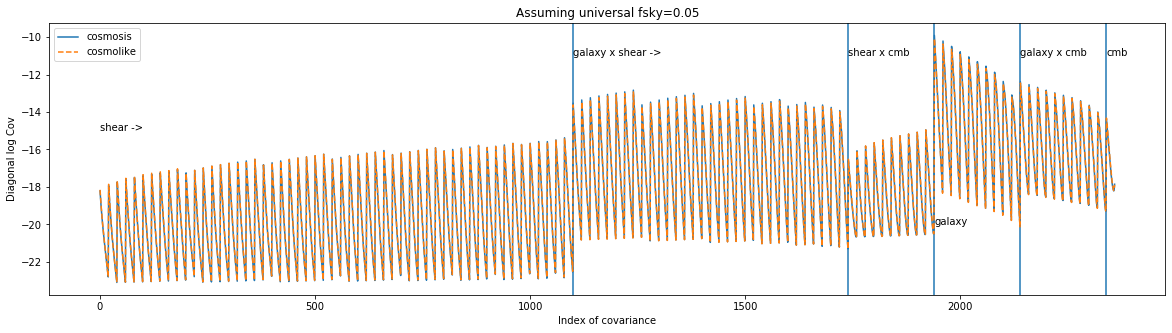

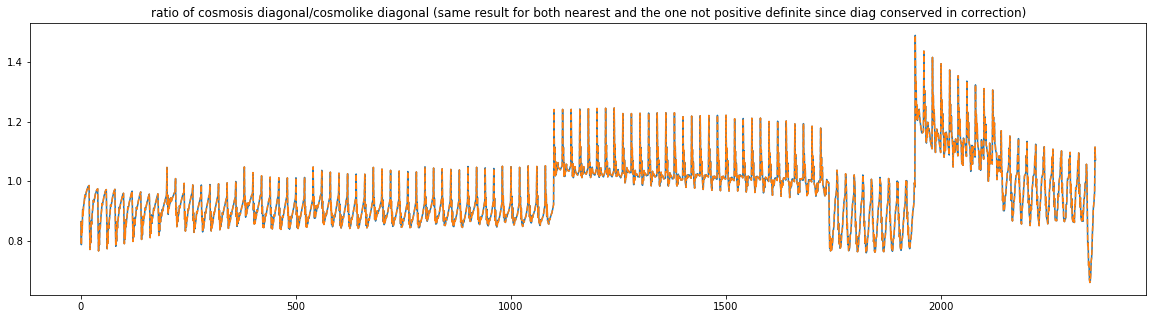

In [29]:
x = np.arange(len(np.diagonal(cov)))
plt.figure(figsize=(20,5))
plt.title("Assuming universal fsky=0.05")
plt.plot(x, np.diagonal(cov_log), label="cosmosis")


plt.text(0, -15, "shear ->")
plt.axvline(x=1100)
plt.text(1100, -11, "galaxy x shear ->")
plt.axvline(x=1740)
plt.text(1740, -11, "shear x cmb")
plt.axvline(x=1940)
plt.text(1940, -20, "galaxy")
plt.axvline(x=2140)
plt.text(2140, -11, "galaxy x cmb")
plt.axvline(x=2340)
plt.text(2340, -11, "cmb")


plt.plot(x, np.diagonal(cosmolike_nearest_log), "--",label="cosmolike")

plt.legend()
plt.ylabel("Diagonal log Cov")
plt.xlabel("Index of covariance")


plt.figure(figsize=(20,5))
plt.title("ratio of cosmosis diagonal/cosmolike diagonal (same result for both nearest and the one not positive definite since diag conserved in correction)")
plt.plot(x,np.diagonal(cov)/np.diagonal(cosmolike_nearest) );
plt.plot(x,np.diagonal(cov)/np.diagonal(cosmolike_notpositivedefinite) , "--");


The two diagonals agree within a factor of 2!

In [38]:
eigenvalues, _ = np.linalg.eig(cov)
eigenvalues_cosmolike_nearest, _ = np.linalg.eig(cosmolike_nearest)
eigenvalues_cosmolike_notpositivedefinite, _ = np.linalg.eig(cosmolike_notpositivedefinite)

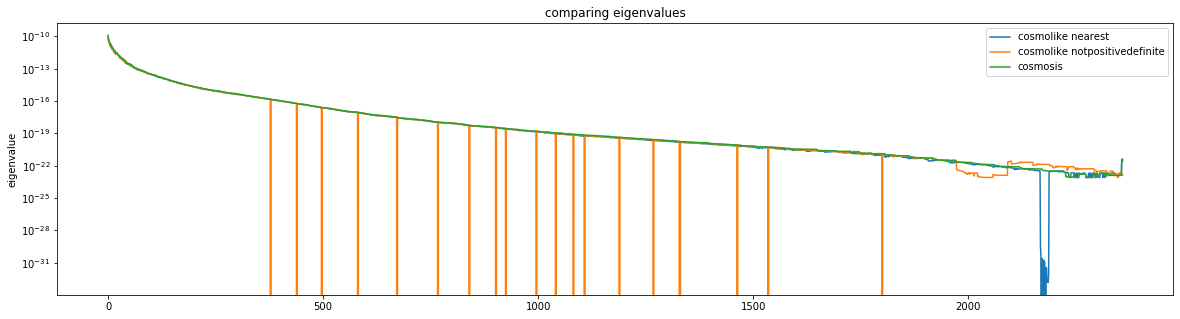

In [44]:

plt.figure(figsize=(20,5))
plt.title("comparing eigenvalues")
plt.plot(range(len(eigenvalues_cosmolike_nearest)), eigenvalues_cosmolike_nearest, label="cosmolike nearest")
plt.plot(range(len(eigenvalues_cosmolike_notpositivedefinite)), eigenvalues_cosmolike_notpositivedefinite, label="cosmolike notpositivedefinite")
plt.plot(range(len(eigenvalues)), eigenvalues, label="cosmosis")
plt.legend()
plt.ylabel("eigenvalue")
plt.yscale("log")

They are mostly consistent but the cosmolike_notpositive definite devitates in the galaxy and galaxy x cmb range as well as has some negative eigenvalues.
The nearest positive definite version corrects a lot of that but has this weard feature in galaxy x cmb

## Lets try to look at the whole matrix

In [47]:
#np.linalg.cholesky(cov)

Text(0.5, 1.0, 'cosmolike not positive definite')

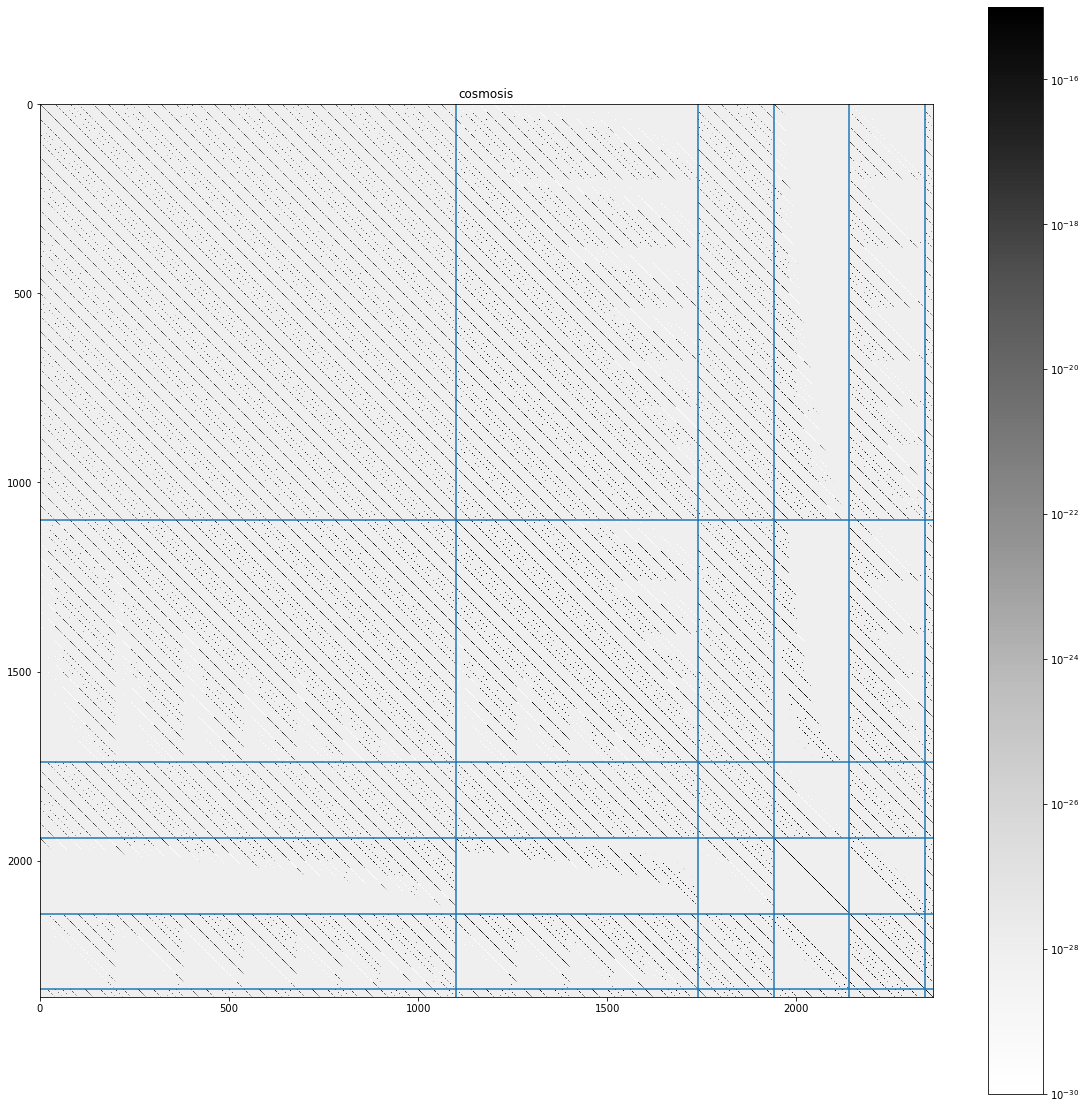

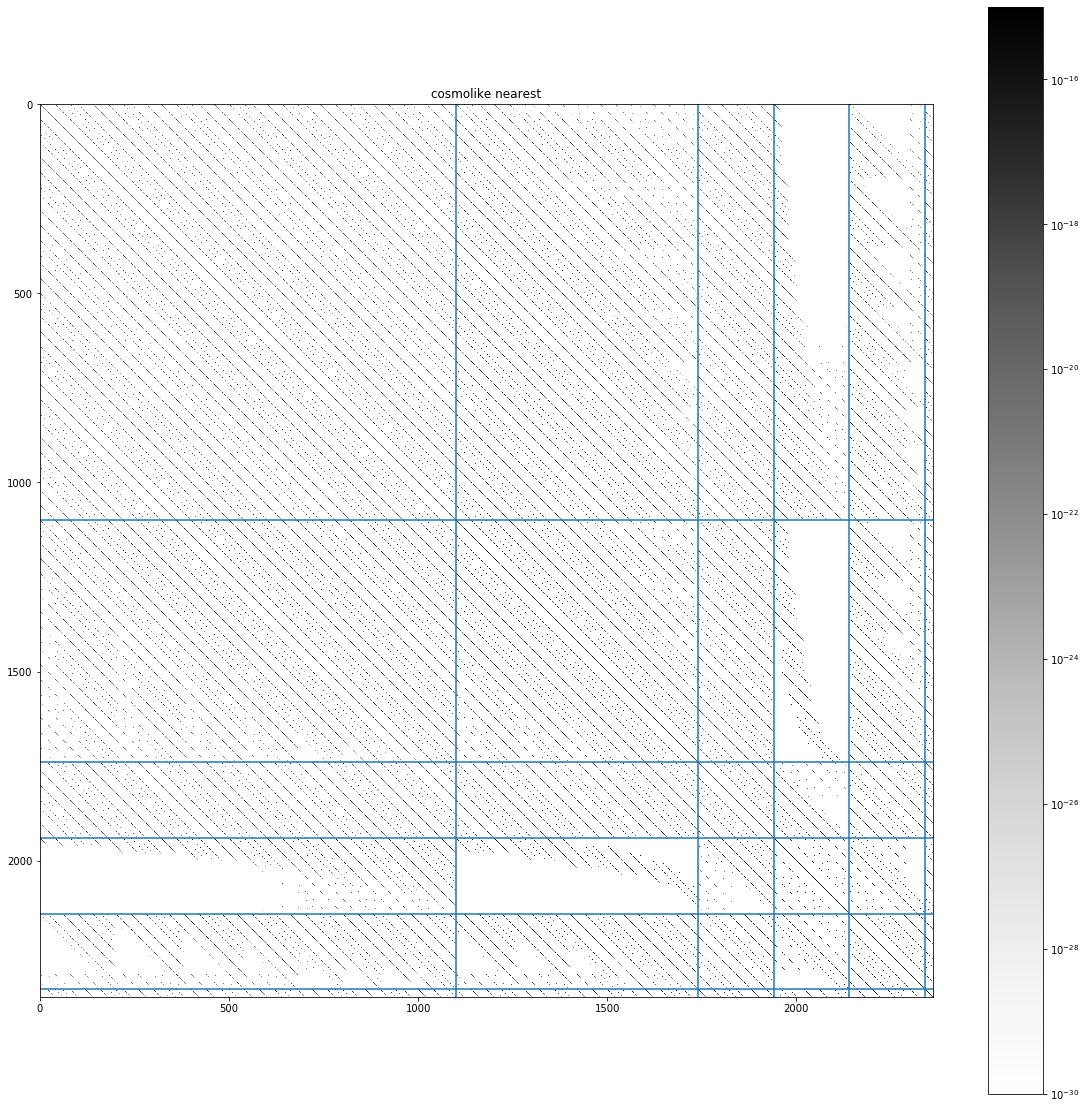

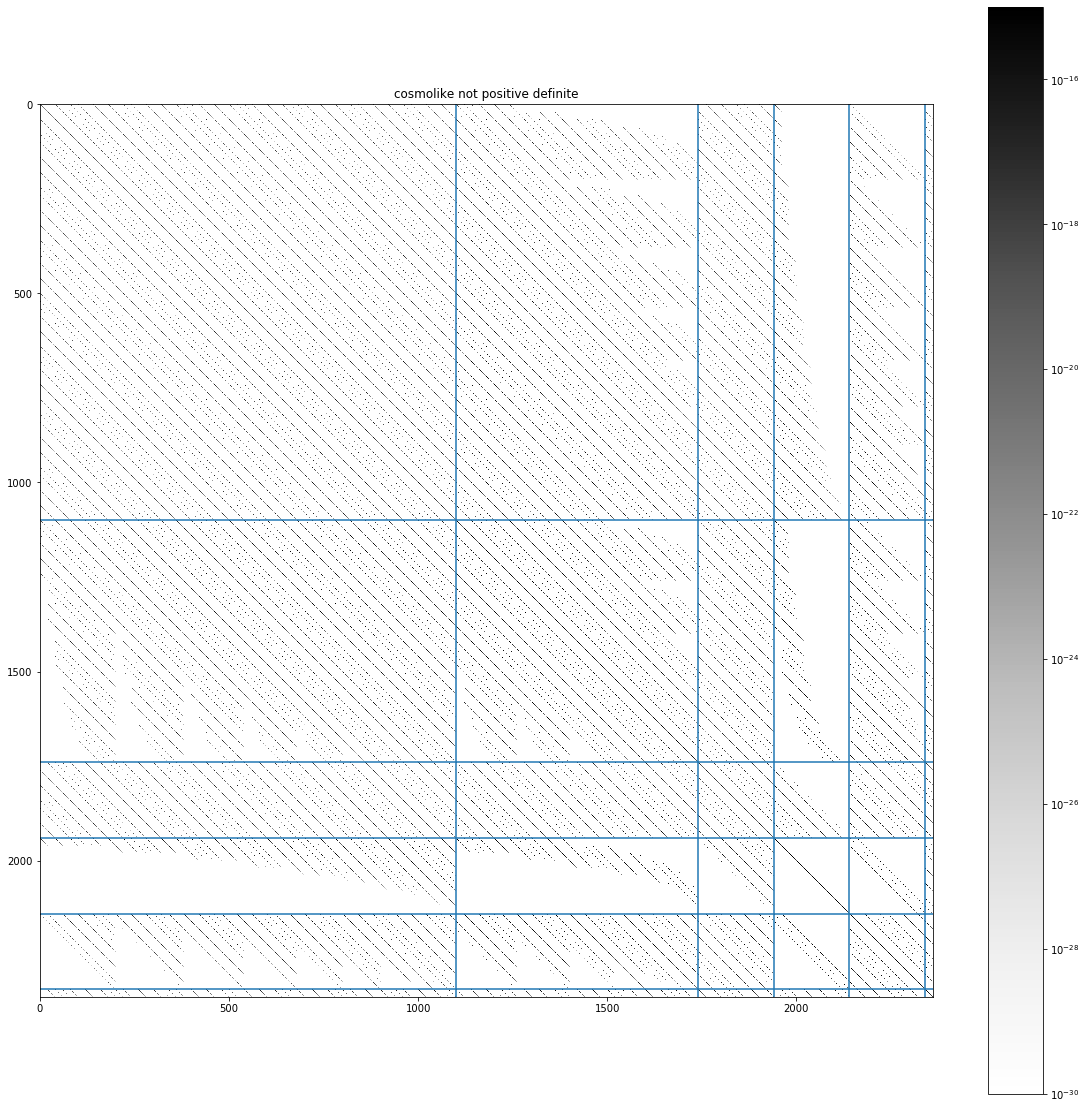

In [81]:
import matplotlib as mpl
plt.figure(figsize=(20,20))
plt.imshow(cov, interpolation='nearest', cmap="Greys",norm=mpl.colors.LogNorm(),)
plt.colorbar()
plt.axvline(x=1100)
plt.axvline(x=1740)
plt.axvline(x=1940)
plt.axvline(x=2140)
plt.axvline(x=2340)
plt.axhline(y=1100)
plt.axhline(y=1740)
plt.axhline(y=1940)
plt.axhline(y=2140)
plt.axhline(y=2340)
plt.clim(1e-30,1e-15)
plt.title("cosmosis")

plt.figure(figsize=(20,20))
plt.imshow(cosmolike_nearest, interpolation='nearest', cmap="Greys",norm=mpl.colors.LogNorm(),)
plt.colorbar()
plt.axvline(x=1100)
plt.axvline(x=1740)
plt.axvline(x=1940)
plt.axvline(x=2140)
plt.axvline(x=2340)
plt.axhline(y=1100)
plt.axhline(y=1740)
plt.axhline(y=1940)
plt.axhline(y=2140)
plt.axhline(y=2340)
plt.clim(1e-30,1e-15)
plt.title("cosmolike nearest")

plt.figure(figsize=(20,20))
plt.imshow(cosmolike_notpositivedefinite, interpolation='nearest', cmap="Greys",norm=mpl.colors.LogNorm(),)
plt.colorbar()
plt.axvline(x=1100)
plt.axvline(x=1740)
plt.axvline(x=1940)
plt.axvline(x=2140)
plt.axvline(x=2340)
plt.axhline(y=1100)
plt.axhline(y=1740)
plt.axhline(y=1940)
plt.axhline(y=2140)
plt.axhline(y=2340)
plt.clim(1e-30,1e-15)
plt.title("cosmolike not positive definite")

## Direct comparison between the matrices:

White indicates good agreement: ratio of 1.
red: cosmosis is much larger
blue: cosmolike is much larger

Text(0.5, 1.0, 'cosmosis vs cosmolike not positive definite')

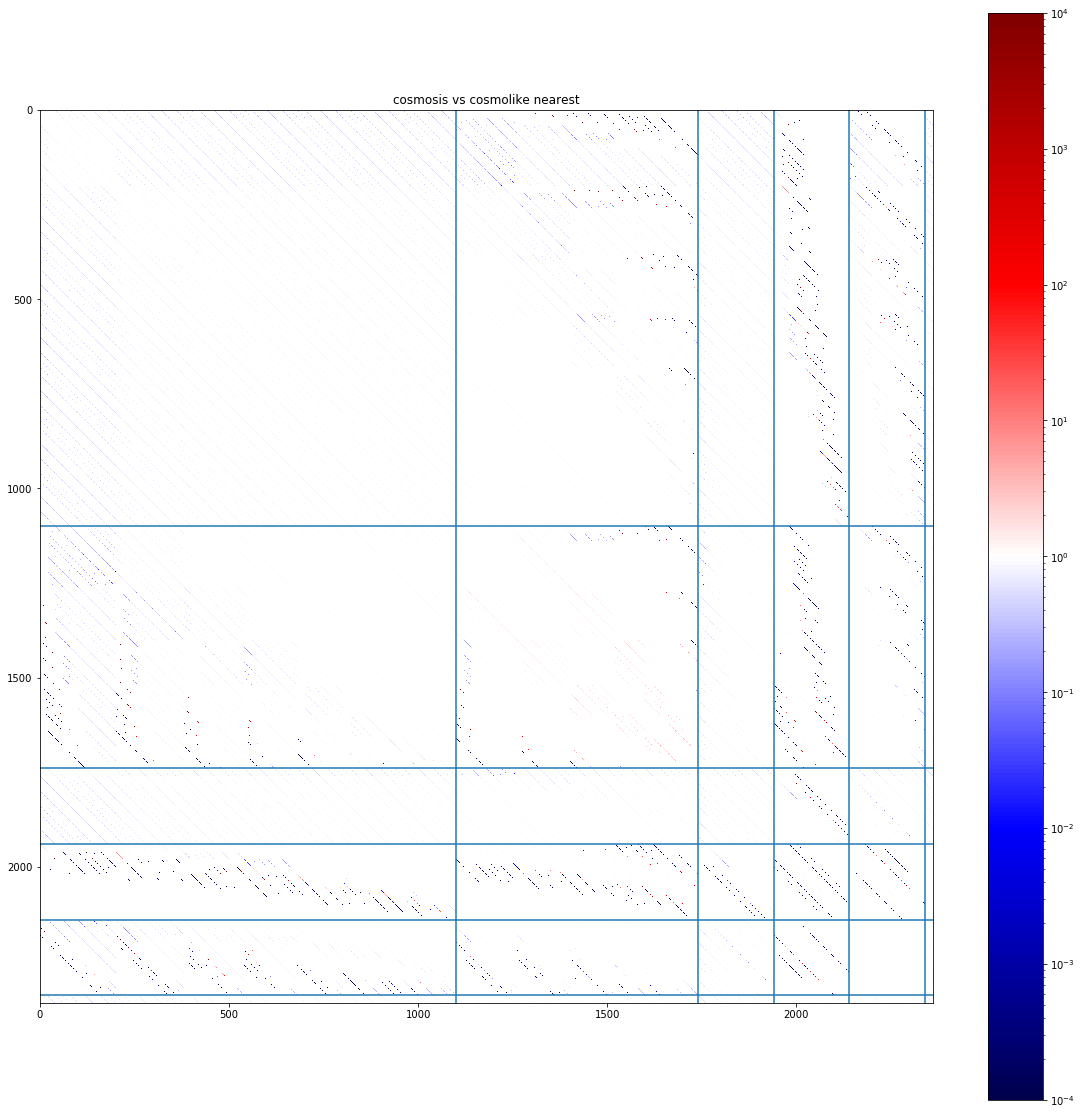

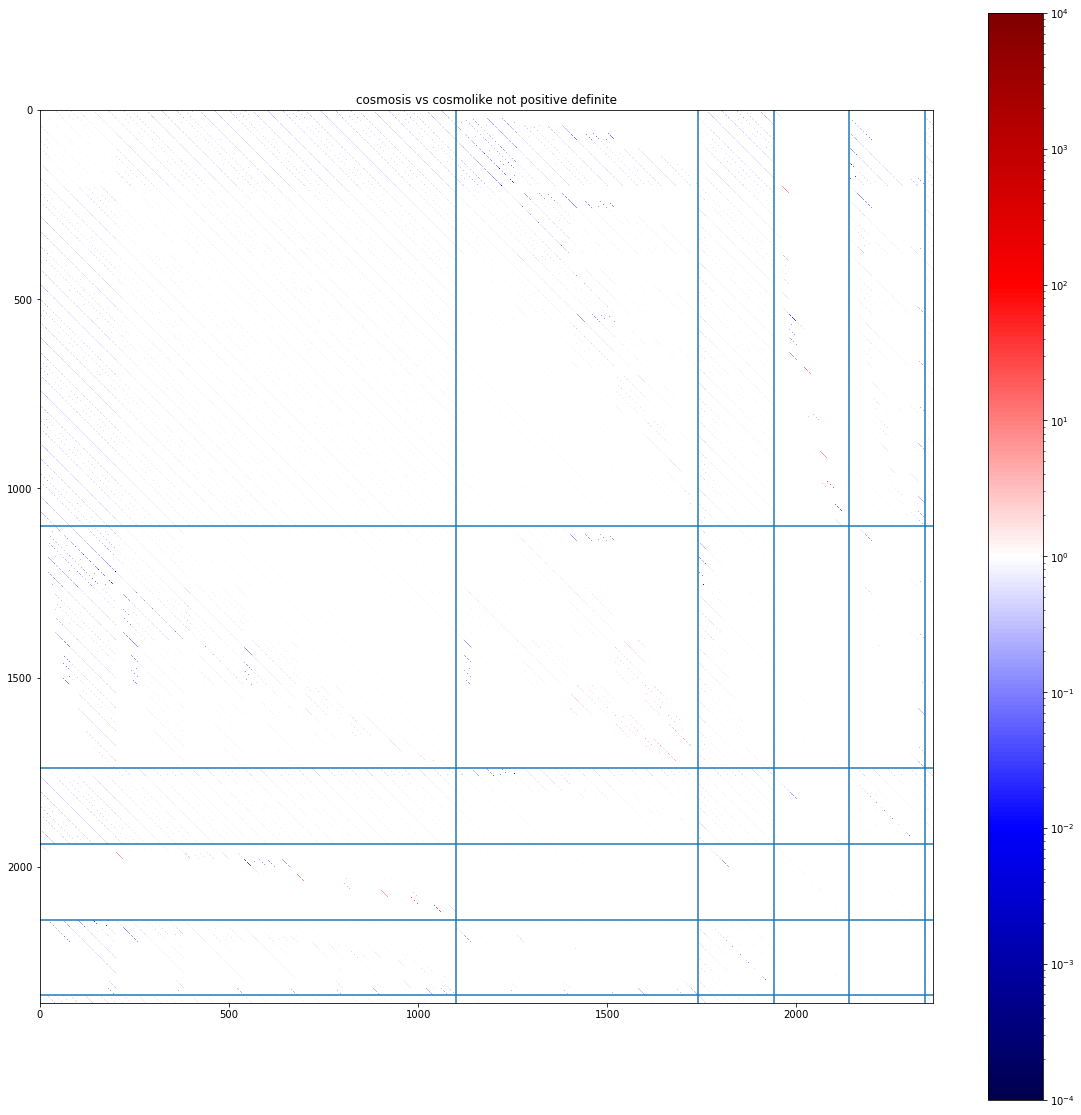

In [84]:
import matplotlib as mpl
plt.figure(figsize=(20,20))
plt.imshow(cov/cosmolike_nearest, interpolation='nearest', cmap="seismic",norm=mpl.colors.LogNorm(),)
plt.colorbar()
plt.axvline(x=1100)
plt.axvline(x=1740)
plt.axvline(x=1940)
plt.axvline(x=2140)
plt.axvline(x=2340)
plt.axhline(y=1100)
plt.axhline(y=1740)
plt.axhline(y=1940)
plt.axhline(y=2140)
plt.axhline(y=2340)
plt.clim(1e-4,10000)
plt.title("cosmosis vs cosmolike nearest")


import matplotlib as mpl
plt.figure(figsize=(20,20))
plt.imshow(cov/cosmolike_notpositivedefinite, interpolation='nearest', cmap="seismic",norm=mpl.colors.LogNorm(),)
plt.colorbar()
plt.axvline(x=1100)
plt.axvline(x=1740)
plt.axvline(x=1940)
plt.axvline(x=2140)
plt.axvline(x=2340)
plt.axhline(y=1100)
plt.axhline(y=1740)
plt.axhline(y=1940)
plt.axhline(y=2140)
plt.axhline(y=2340)
plt.clim(1e-4,10000)
plt.title("cosmosis vs cosmolike not positive definite")

Before the correction the covariance matrix agrees pretty well with cosmsis. However there is a few notable regions where there is factor 10-100 difference. Most of these seem to be related galaxy and shear combinations